In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_train = pd.read_csv('train.csv', delimiter='\t')
df_test = pd.read_csv('test.csv', delimiter='\t')

In [3]:
df_train.head()

,id,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
0,0,0,715,0,0,423,206,150,1,34,36981,0.684902,3958.863636,97.513514,1.473684,0.504505
1,2,0,2151,0,0,1457,1321,1704,1,90,35603,0.704787,2746.533708,69.988827,3.814815,0.553073
2,3,0,439,0,0,691,213,5,0,15,38432,0.528857,11005.031847,75.101266,1.142857,0.158228
3,7,0,28,1,0,285,31,0,0,1,4898,0.810427,6495.666667,93.029412,3.000000,0.029412
4,12,0,40,0,0,907,60,1013,1,2,47238,0.831579,112167.300000,79.142857,1.000000,0.047619


In [4]:
df_test.head()

,id,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
0,1,1990,0,0,546,1225,133,0,53,21007,0.869048,2208.218750,90.363636,2.5,0.121212
1,4,601,0,0,948,368,212,0,32,26934,0.612211,292.957143,65.829787,2.0,0.609929
2,5,17,0,0,301,39,1,0,5,25497,0.879310,116383.545455,98.666667,1.0,0.083333
3,6,271,0,0,126,62,3,0,2,70240,0.741379,24589.039682,75.204724,3.0,0.157480
4,8,8,1,0,960,146,24,0,0,12162,0.500000,32.428571,35.750000,1.0,0.250000


In [5]:
print(df_train.shape)
print(df_test.shape)
print(df_train.info())
print(df_test.info())

(1588, 16)
(1588, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588 entries, 0 to 1587
Data columns (total 16 columns):
id                          1588 non-null int64
bot                         1588 non-null int64
statuses_count              1588 non-null int64
default_profile             1588 non-null int64
default_profile_image       1588 non-null int64
friends_count               1588 non-null int64
followers_count             1588 non-null int64
favourites_count            1588 non-null int64
geo_enabled                 1588 non-null int64
listed_count                1588 non-null int64
account_age_hours           1588 non-null int64
diversity                   1588 non-null float64
mean_mins_between_tweets    1588 non-null float64
mean_tweet_length           1588 non-null float64
mean_retweets               1588 non-null float64
reply_rate                  1588 non-null float64
dtypes: float64(5), int64(11)
memory usage: 198.6 KB
None
<class 'pandas.core.frame.DataFrame

In [6]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

id                          0
bot                         0
statuses_count              0
default_profile             0
default_profile_image       0
friends_count               0
followers_count             0
favourites_count            0
geo_enabled                 0
listed_count                0
account_age_hours           0
diversity                   0
mean_mins_between_tweets    0
mean_tweet_length           0
mean_retweets               0
reply_rate                  0
dtype: int64
id                          0
statuses_count              0
default_profile             0
default_profile_image       0
friends_count               0
followers_count             0
favourites_count            0
geo_enabled                 0
listed_count                0
account_age_hours           0
diversity                   0
mean_mins_between_tweets    0
mean_tweet_length           0
mean_retweets               0
reply_rate                  0
dtype: int64


In [7]:
df_train.corr()

,id,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
id,1.000000,0.021782,0.015923,0.053258,-0.003672,0.005114,0.009893,0.031527,-0.020958,0.019699,0.007482,-0.036990,-0.012682,0.000057,-0.015360,-0.026738
bot,0.021782,1.000000,-0.127216,0.339105,0.399564,-0.024027,-0.033112,-0.078671,-0.252564,-0.075608,-0.229746,0.112604,0.253207,-0.129651,-0.024273,-0.082452
statuses_count,0.015923,-0.127216,1.000000,-0.144709,-0.066344,0.295279,0.237502,0.309038,0.074858,0.303930,0.189305,-0.071162,-0.089360,-0.017772,0.008460,0.138921
default_profile,0.053258,0.339105,-0.144709,1.000000,0.228111,-0.037176,-0.044361,-0.099137,-0.184825,-0.106799,-0.272503,0.022354,0.152235,-0.054538,-0.020206,-0.023419
default_profile_image,-0.003672,0.399564,-0.066344,0.228111,1.000000,-0.007195,-0.015204,-0.039541,-0.124046,-0.040419,-0.102719,0.050489,0.258645,-0.155200,-0.013989,-0.023842
friends_count,0.005114,-0.024027,0.295279,-0.037176,-0.007195,1.000000,0.922871,0.123385,0.005181,0.348717,0.031618,-0.074305,-0.015428,0.028831,0.013843,-0.010471
followers_count,0.009893,-0.033112,0.237502,-0.044361,-0.015204,0.922871,1.000000,0.098982,0.014417,0.405729,0.035094,-0.062057,-0.020385,0.033969,0.042584,-0.002805
favourites_count,0.031527,-0.078671,0.309038,-0.099137,-0.039541,0.123385,0.098982,1.000000,0.040742,0.200756,0.111353,0.003540,-0.053377,-0.036438,0.006687,0.105890
geo_enabled,-0.020958,-0.252564,0.074858,-0.184825,-0.124046,0.005181,0.014417,0.040742,1.000000,0.041562,0.307193,-0.041680,-0.110201,-0.057954,-0.022539,0.096960
listed_count,0.019699,-0.075608,0.303930,-0.106799,-0.040419,0.348717,0.405729,0.200756,0.041562,1.000000,0.159773,-0.037145,-0.051144,0.030659,0.048199,0.065247


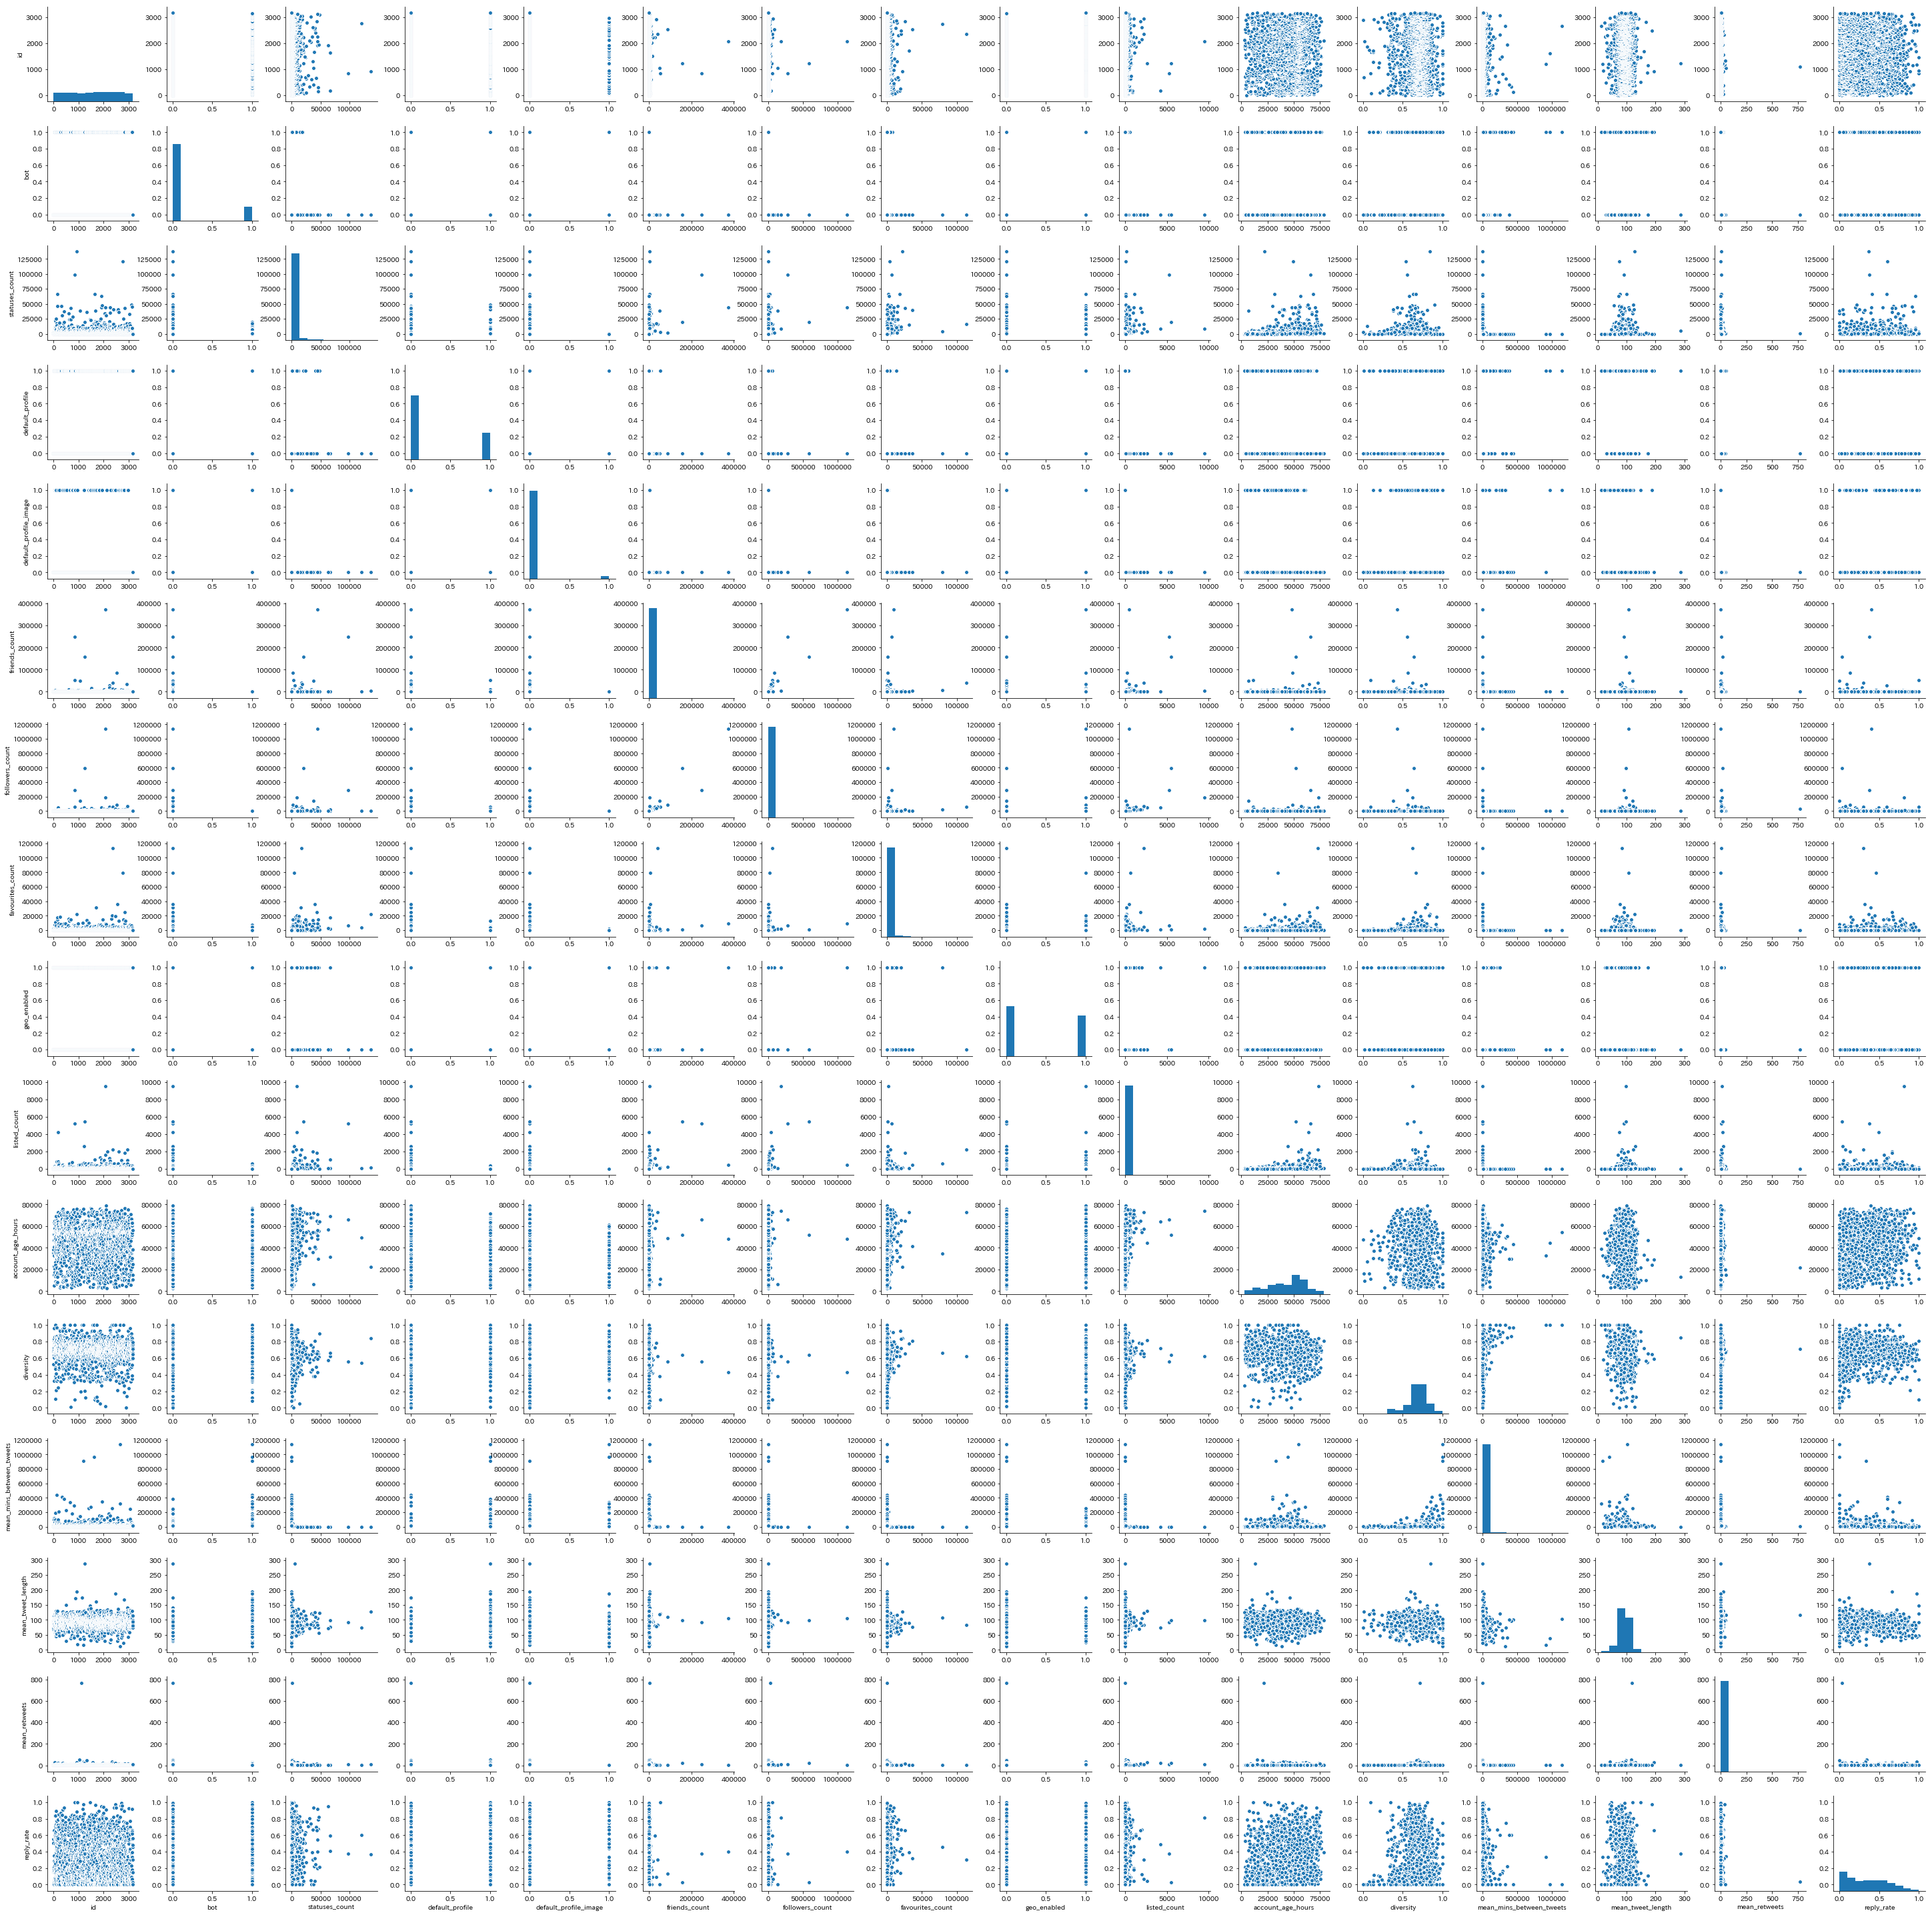

In [20]:
sns.pairplot(df_train)

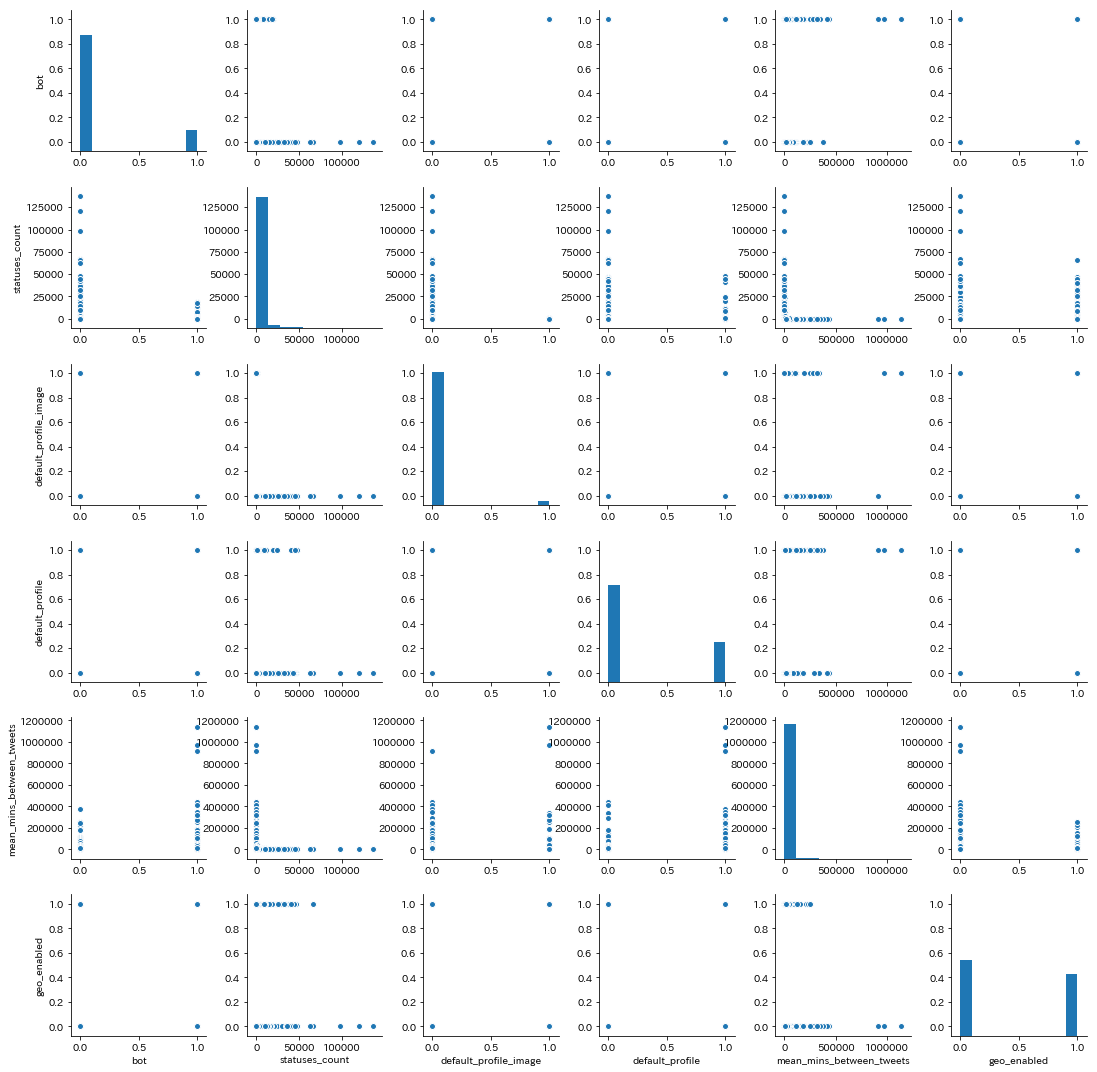

In [19]:
sns.pairplot(df_train[['bot', 'statuses_count','default_profile_image', 'default_profile', 'mean_mins_between_tweets', 'geo_enabled']])
# ファイルを提出してから気が付いたが0,1データのみのカラムあり、、0,1データのカラムは次回以降外すことを検討

In [ ]:
# botと相関がありそうなのはdefault_profile_image,default_profile, mean_mins_between_tweets,geo_enabled,account_age_hours 相関係数0.22以上
# ただし最も相関係数が高いdefault_profile_imageでも0.4程度

In [8]:
trainX = df_train[['default_profile_image', 'default_profile', 'mean_mins_between_tweets', 'geo_enabled']]

In [9]:
trainX.head()

,default_profile_image,default_profile,mean_mins_between_tweets,geo_enabled
0,0,0,3958.863636,1
1,0,0,2746.533708,1
2,0,0,11005.031847,0
3,0,1,6495.666667,0
4,0,0,112167.300000,1


In [10]:
trainY = df_train['bot']

In [11]:
# モデルの宣言
model = RandomForestClassifier(n_estimators = 80, random_state=0)

In [12]:
# 学習
model.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [13]:
testX = df_test[['default_profile_image', 'default_profile', 'mean_mins_between_tweets', 'geo_enabled']]

In [14]:
# 予測
pred = model.predict(testX)

In [15]:
output = pd.read_csv('test.csv', delimiter='\t')

In [16]:
output['bot'] = pred

In [17]:
output[['id', 'bot']].to_csv('submission1.csv', index=False, header=False)

In [ ]:
# 結果は0.41618